## **TITLE: UNLEASING MY INNER PIKACHU: A DATA JOURNEY THROUGH POKÈMON**
### Group Name: Pikachus<br> Members Name: Rijan Ghimire, Ritik Thakur, Saroj Singh Dhami <br>Roll No.: ACE080bct055, ACE080bct056, ACE080bct069,

<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExeDEwZjBic2sxN2QweW9iYjk4cG9heDA0Mng3ZjljdTU5YXdhOXBvYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/10LKovKon8DENq/giphy.gif" width="800" height="400">


In [1]:
print("Pika Pika")

Pika Pika


## <u>Importing Libraries</u>

In [2]:
import pandas as pd
import numpy as np 

In [3]:
df = pd.read_csv("Datasets/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Check the structure of the dataset (columns, data types, etc.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


In [5]:
# Statistical summary for numerical columns
print(df.describe())

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

## <u>Handling Missing Data</u>

In [6]:
# Check for missing values
print(df.isnull().sum())

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [7]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
df_copy = df.copy()

# Fill missing values in 'Type 2' with 'None'
df['Type 2'].fillna('None', inplace=True)

# Filters rows where the 'Type 2' was NaN
updated_rows = df_copy[df_copy[['Type 2']].isna().any(axis=1)]

# Display the updated rows with their new values
print("\nRows where missing values were imputed:")
print(df.loc[updated_rows.index, ['Name', 'Type 1', 'Type 2']].head(10))


Rows where missing values were imputed:
                       Name  Type 1 Type 2
4                Charmander    Fire   None
5                Charmeleon    Fire   None
9                  Squirtle   Water   None
10                Wartortle   Water   None
11                Blastoise   Water   None
12  BlastoiseMega Blastoise   Water   None
13                 Caterpie     Bug   None
14                  Metapod     Bug   None
24                  Rattata  Normal   None
25                 Raticate  Normal   None


/var/folders/v1/n0ygwr2s65v1fqj84kwq2cdw0000gn/T/ipykernel_4519/590086624.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna('None', inplace=True)


In [9]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

#### *Hence the missing data are handled.*

# **<u>Visualization</u>**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

## <u>Bar Plot</u>

/var/folders/v1/n0ygwr2s65v1fqj84kwq2cdw0000gn/T/ipykernel_4519/4267381023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type 1', y='Total', data=df, palette='viridis', errorbar=None)


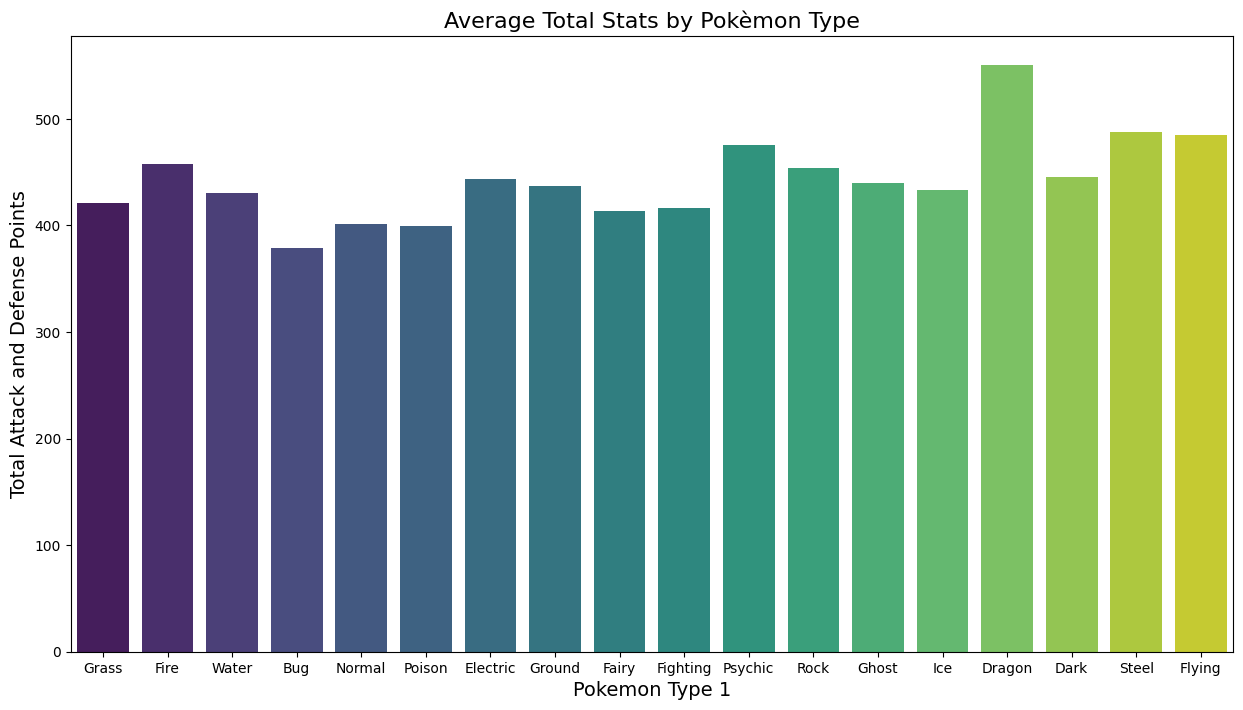

In [11]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Type 1', y='Total', data=df, palette='viridis', errorbar=None)

plt.title("Average Total Stats by Pokèmon Type", fontsize=16)
plt.xlabel("Pokemon Type 1", fontsize=14)
plt.ylabel("Total Attack and Defense Points", fontsize=14)
plt.show()

<img src="https://i.redd.it/fx4rrfp4kkkd1.jpeg" width="600" height="500">

#### *The 'Dragon' Type Pokèmon has high average stats i.e higher attack and defense points and 'Bug' type Pokèmons are weak compared to others.*

## <u>Counter Plot</u>

/var/folders/v1/n0ygwr2s65v1fqj84kwq2cdw0000gn/T/ipykernel_4519/512470327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Generation'], palette='gist_rainbow')


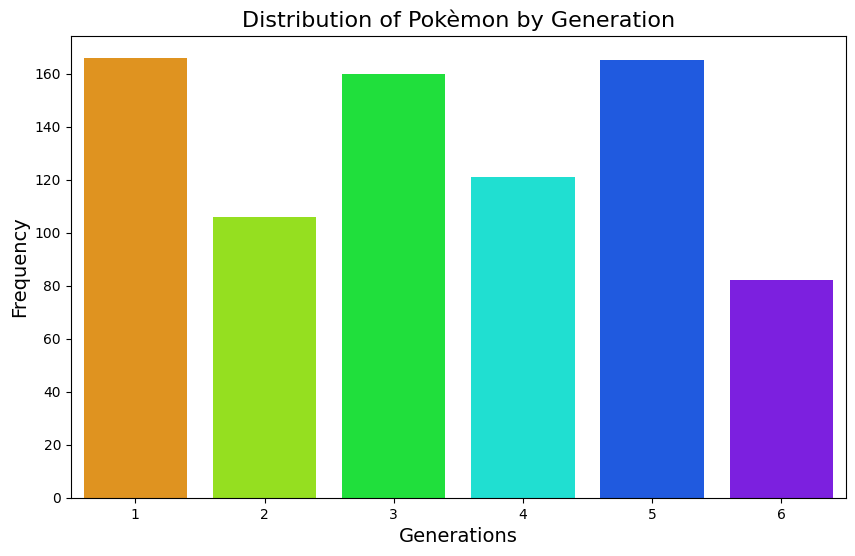

In [12]:
fig = plt.figure(figsize=(10, 6))
sns.countplot(x=df['Generation'], palette='gist_rainbow')
plt.title("Distribution of Pokèmon by Generation", fontsize=16)
plt.xlabel("Generations", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

## <u>Pie chart</u>

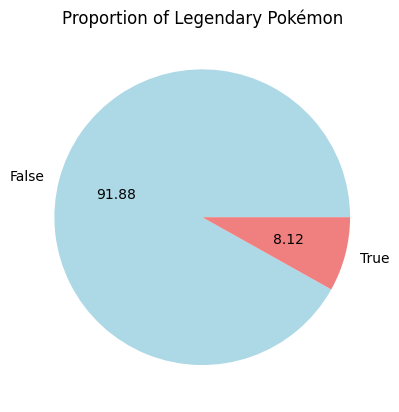

In [13]:
df['Legendary'].value_counts().plot(kind='pie', autopct='%0.2f', colors=['lightblue', 'lightcoral'])
plt.title("Proportion of Legendary Pokémon")
plt.ylabel("")
plt.show()

## <u>Histogram Plot</u>

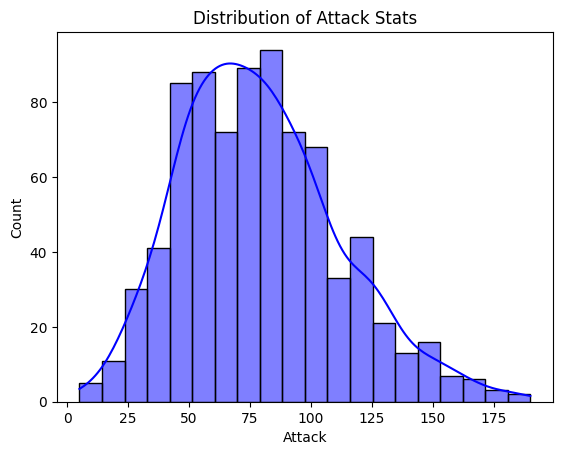

In [14]:
sns.histplot(df['Attack'], kde= True, color='Blue')
plt.title("Distribution of Attack Stats")
plt.show()

## <u>Scatter Plot</u>

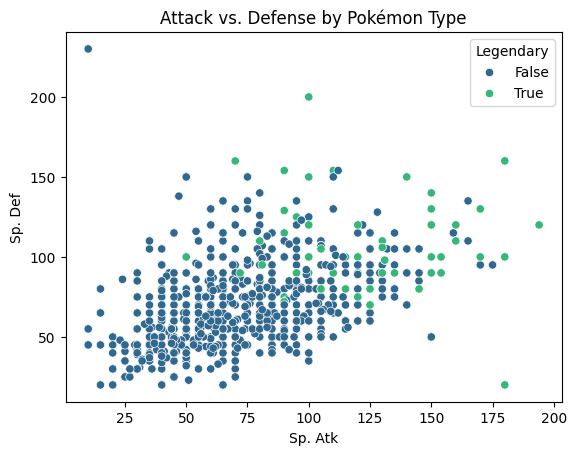

In [15]:
sns.scatterplot(x='Sp. Atk', y='Sp. Def', hue='Legendary', data=df, palette='viridis')
plt.title("Attack vs. Defense by Pokémon Type")
plt.show()

## <u>Heatmap</u>

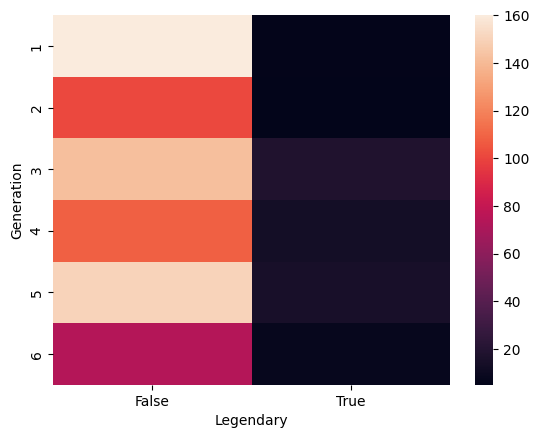

In [16]:
sns.heatmap(pd.crosstab(df['Generation'], df['Legendary']))
plt.show()

# **<u>Feature Engineering</u>**

## <u>Label Encoding</u>

In [18]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Size'
label_encoder = LabelEncoder()
df['Legendary'] = label_encoder.fit_transform(df['Legendary'])

print("\nDataFrame after Label Encoding for 'Legendary':\n", df[['Name','Type 1', 'Type 2', 'Legendary']])

ModuleNotFoundError: No module named 'sklearn'

### <u>Onehot Encoding</u>

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), ['Type 1'])],  # Use column name 'Type 1'
    remainder='passthrough'  # Keep numerical columns as they are
)

# Apply the transformation
transformed_data = preprocessor.fit_transform(df)

# Convert back to DataFrame with feature names
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(transformed_data, columns=feature_names)

# Display the encoded DataFrame
print(df_encoded.head())

  onehot__Type 1_Bug onehot__Type 1_Dark onehot__Type 1_Dragon  \
0                0.0                 0.0                   0.0   
1                0.0                 0.0                   0.0   
2                0.0                 0.0                   0.0   
3                0.0                 0.0                   0.0   
4                0.0                 0.0                   0.0   

  onehot__Type 1_Electric onehot__Type 1_Fairy onehot__Type 1_Fighting  \
0                     0.0                  0.0                     0.0   
1                     0.0                  0.0                     0.0   
2                     0.0                  0.0                     0.0   
3                     0.0                  0.0                     0.0   
4                     0.0                  0.0                     0.0   

  onehot__Type 1_Fire onehot__Type 1_Flying onehot__Type 1_Ghost  \
0                 0.0                   0.0                  0.0   
1                 0.0 

### <u>Feature Scaling</u>

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()

# Select numerical columns for scaling
df_scalers = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

# Apply scalers
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_scalers), columns=df_scalers.columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_scalers), columns=df_scalers.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df_scalers), columns=df_scalers.columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df_scalers), columns=df_scalers.columns)

# Log Transformation (Handling zero by adding 1) only on the numerical columns
df_log = df_scalers.copy()
df_log = np.log1p(df_log)

# Display results
print("\nStandard Scaled Data:\n", df_standard.head())
print("\nMinMax Scaled Data:\n", df_minmax.head())
print("\nRobust Scaled Data:\n", df_robust.head())
print("\nMaxAbs Scaled Data:\n", df_maxabs.head())
print("\nLog Transformed Data:\n", df_log.head())




Standard Scaled Data:
       Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
0 -0.976765 -0.950626 -0.924906 -0.797154 -0.239130 -0.248189 -0.801503   
1 -0.251088 -0.362822 -0.524130 -0.347917  0.219560  0.291156 -0.285015   
2  0.749845  0.420917  0.092448  0.293849  0.831146  1.010283  0.403635   
3  1.583957  0.420917  0.647369  1.577381  1.503891  1.729409  0.403635   
4 -1.051836 -1.185748 -0.832419 -0.989683 -0.392027 -0.787533 -0.112853   

   Generation  
0   -1.399637  
1   -1.399637  
2   -1.399637  
3   -1.399637  
4   -1.399637  

MinMax Scaled Data:
       Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
0  0.230000  0.173228  0.237838  0.195556  0.298913  0.214286  0.228571   
1  0.375000  0.232283  0.308108  0.257778  0.380435  0.285714  0.314286   
2  0.575000  0.311024  0.416216  0.346667  0.489130  0.380952  0.428571   
3  0.741667  0.311024  0.513514  0.524444  0.608696  0.476190  0.428571   
4  0.215000  0.149606  0.254054 

### <u>Handling Outliers</u>

In [26]:
df_numeric = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

# Calculate Q1, Q3, and IQR for each numerical column
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = (df_numeric < lower_bound) | (df_numeric > upper_bound)

# Display if there are outliers in any columns
outliers_count = outliers.sum()
print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
Total          0
HP            19
Attack         7
Defense       13
Sp. Atk       10
Sp. Def        7
Speed          2
Generation     0
dtype: int64


In [27]:
# Create a copy to replace outliers
df_fixed = df_numeric.copy()

# Replace outliers with the median of each column
for col in df_numeric.columns:
    median_value = df_numeric[col].median()
    df_fixed[col] = df_numeric[col].mask(outliers[col], median_value)

# Show updated dataset
print("Outliers replaced with median values.")
print(df_fixed.head())


Outliers replaced with median values.
   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
0    318  45      49       49       65       65     45           1
1    405  60      62       63       80       80     60           1
2    525  80      82       83      100      100     80           1
3    625  80     100      123      122      120     80           1
4    309  39      52       43       60       50     65           1


#### *This concludes there is no outliers in the dataset.*

### <u>Feature Selection</u>

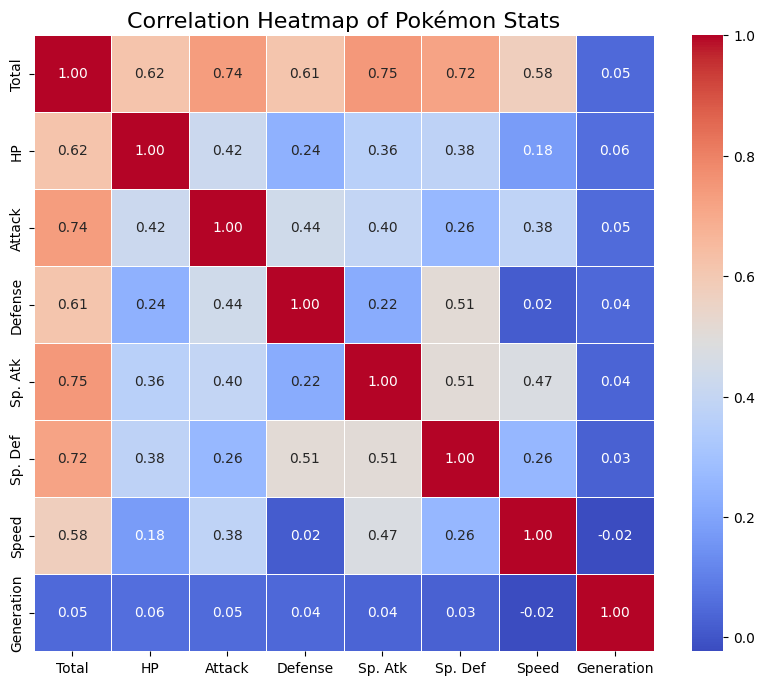

['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']


In [28]:
# Calculate correlation matrix
corr_matrix = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pokémon Stats", fontsize=16)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)

## <u>Principle Component Analysis (PCA)</u>

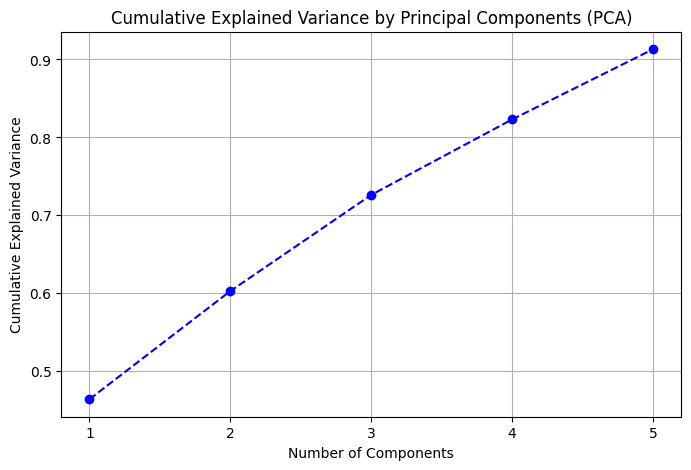

Explained Variance Ratio (each component): [0.46410425 0.13876986 0.12336467 0.09686493 0.09003388]


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame
df_numeric = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

# Optionally, scale the data (important for PCA)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply PCA
pca = PCA(n_components=5)  # You can choose the number of components
df_pca = pca.fit_transform(df_scaled)

# Convert the PCA result into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(5)])

# Explained variance (to show the percentage of variance explained by each component)
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')

plt.title("Cumulative Explained Variance by Principal Components (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(range(1, len(explained_variance) + 1))  # To ensure every component has a tick
plt.grid(True)
plt.show()

# Display the explained variance ratio for each component
print("Explained Variance Ratio (each component):", explained_variance)


## <u>Linear Regression</u>

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Selecting Feature (X) and Target (y)
X = df[['Attack']].values  # Independent variable (feature)
y = df['Sp. Atk'].values   # Dependent variable (target)

In [32]:
# Splitting dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize theta using Least Squares solution
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [34]:
# Define Mean Squared Error (MSE) function
def mse(yhat, y):
    return ((yhat - y) ** 2).sum() / yhat.shape[0]

# Calculate training MSE
yhat_train = X_train @ theta
mse_train = mse(yhat_train, y_train)

# Calculate testing MSE
yhat_test = X_test @ theta
mse_test = mse(yhat_test, y_test)

# Print results
print("MSE on Training Data: ", mse_train)
print("MSE on Testing Data: ", mse_test)


MSE on Training Data:  1145.2182369798243
MSE on Testing Data:  1157.4500263328796


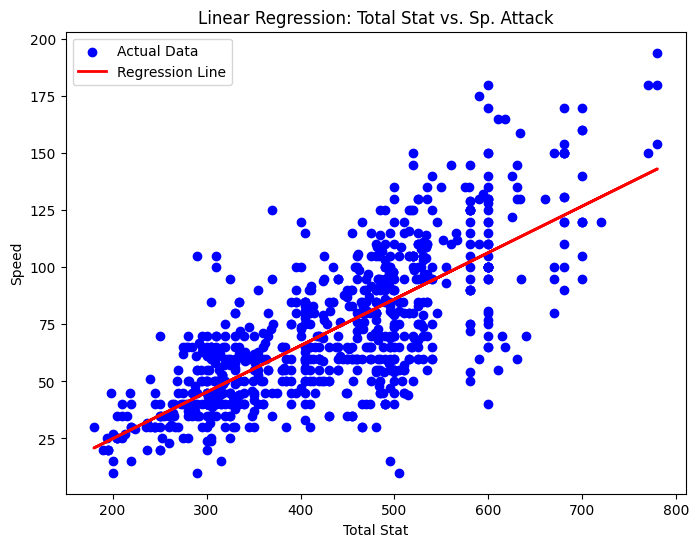

Slope (m): 0.2038
Intercept (b): -15.8657
R² Score (Accuracy): 0.5584


In [35]:
# Selecting Features (X) and Target (y)
X = df['Total'].values  # Convert to NumPy array
y = df['Sp. Atk'].values

# Calculate means
x_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate slope (m) and intercept (b) using the Least Squares formula
n = len(X)
numerator = np.sum(X * y) - n * x_mean * y_mean
denominator = np.sum(X**2) - n * x_mean**2
m = numerator / denominator  # Slope
b = y_mean - m * x_mean  # Intercept

# Predict values using the manually calculated line equation
y_pred = m * X + b

# Plot Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label="Actual Data")  # Scatter plot of actual data
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")  # Regression line
plt.xlabel("Total Stat")
plt.ylabel("Speed")
plt.title("Linear Regression: Total Stat vs. Sp. Attack")
plt.legend()
plt.show()

# Print calculated slope and intercept
print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")

# Calculate R-squared (Goodness of Fit)
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
ss_residual = np.sum((y - y_pred) ** 2)  # Residual sum of squares
r2_score = 1 - (ss_residual / ss_total)

print(f"R² Score (Accuracy): {r2_score:.4f}")


## <u>Multiple Linear Regression</u>

In [36]:
# Selecting Features (X) and Target (y)
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[features].values  # Independent variables (features)
y = df['Total'].values  # Dependent variable (target)

# Add bias term (column of 1s for intercept)
X_bias = np.c_[np.ones(X.shape[0]), X]  # Add intercept column

# Print the shape of X_bias
print("Shape of X_bias:", X_bias.shape)


Shape of X_bias: (800, 7)


In [37]:
# Compute coefficients using Normal Equation: (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y  # Calculate coefficients

# Extract slope (m) and intercept (b)
b = theta[0]  # Intercept
m_values = theta[1:]  # Slopes for each feature

# Print the calculated intercept and slopes for each feature
print(f"Intercept (b): {b:.4f}")
for feature, m in zip(features, m_values):
    print(f"Slope for {feature}: {m:.4f}")

Intercept (b): 0.0000
Slope for HP: 1.0000
Slope for Attack: 1.0000
Slope for Defense: 1.0000
Slope for Sp. Atk: 1.0000
Slope for Sp. Def: 1.0000
Slope for Speed: 1.0000


In [38]:
# Predict values using the manually computed equation
y_pred = X_bias @ theta 

# Print the first 5 predictions as a sample
print("First 5 predictions:", y_pred[:5])


First 5 predictions: [318. 405. 525. 625. 309.]


In [39]:
# Calculate R-squared (Goodness of Fit)
ss_total = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
ss_residual = np.sum((y - y_pred) ** 2)  # Residual sum of squares
r2_score = 1 - (ss_residual / ss_total)

# Print the R-squared score (accuracy)
print(f"R² Score (Accuracy): {r2_score:.4f}")

R² Score (Accuracy): 1.0000


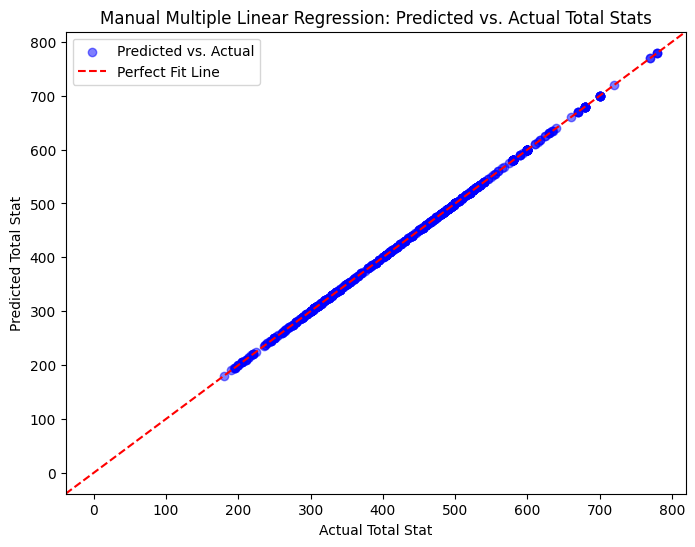

In [40]:
# Scatter Plot: Actual vs. Predicted Total Stats
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5, label="Predicted vs. Actual")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Fit Line")
plt.xlabel("Actual Total Stat")
plt.ylabel("Predicted Total Stat")
plt.title("Manual Multiple Linear Regression: Predicted vs. Actual Total Stats")
plt.legend()
plt.show()


## <u>Logistic Regression</u>

In [41]:
# Select relevant features.
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[features].values

# Target variable (Legendary status)
y = df['Legendary'].astype(int).values  # Convert to 0 and 1

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights, bias):
    m = len(y)
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        z = np.dot(X, weights) + bias
        predictions = sigmoid(z)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute and store cost
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)

    return weights, bias, cost_history

# Predict function
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    return [1 if p >= 0.5 else 0 for p in predictions]

# Initialize weights and bias
weights = np.zeros(X.shape[1])  # One weight for each feature
bias = 0

# Hyperparameters
learning_rate = 0.1
epochs = 1000

# Train the model
weights, bias, cost_history = gradient_descent(X, y, weights, bias, learning_rate, epochs)

# Make predictions
y_pred = predict(X, weights, bias)

# Evaluate accuracy
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)


Accuracy: 0.94


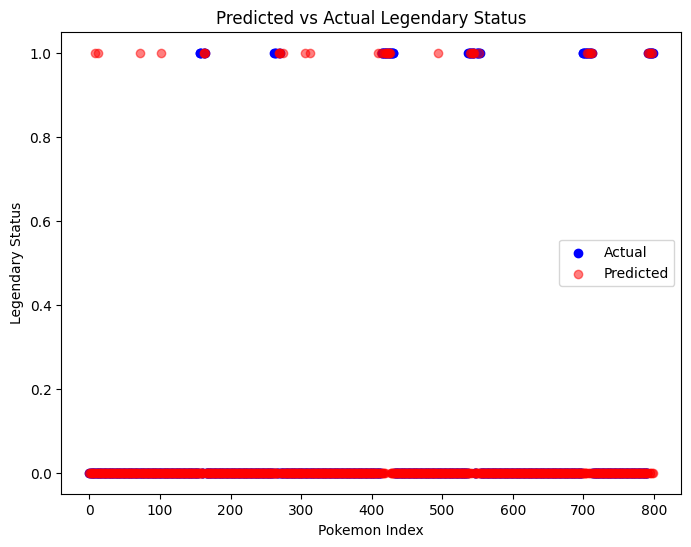

In [42]:
# Scatter plot of predicted vs actual Legendary status
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual')  # Actual labels
plt.scatter(range(len(y)), y_pred, color='red', alpha=0.5, label='Predicted')  # Predicted labels
plt.title("Predicted vs Actual Legendary Status")
plt.xlabel("Pokemon Index")
plt.ylabel("Legendary Status")
plt.legend()
plt.show()

<img src="./Datasets/choose.png" width="500" height="200">